<a href="https://colab.research.google.com/github/Ayantika1998/Assignments/blob/main/Insurance_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # for linear algebra
import pandas as pd #  for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #for visualization
from scipy.stats import norm 
from scipy import stats

In [2]:
dataset = pd.read_csv('insurance.csv')
print('\nNumber of rows and columns in the data set: ',dataset.shape) #printing no. of rows and coloumns


Number of rows and columns in the data set:  (1338, 7)


In [3]:
dataset.head() # printing top few rows and columns in the dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print('Data Info')
dataset.info() # checking no. of non_numerical coloumns

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# **Data Dictionary**
## Independent Varriable
age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

## Dependent Varriable

charges: Individual medical costs billed by health insurance item

# **Exploratory Data Analysis(EDA)**

## Tabulation of the effects of attributes on target attributes and other attributes

### Plots

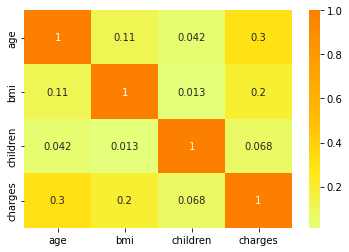

In [5]:
#Correlation Plots
corr = dataset.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [6]:
#scatterplot
import plotly.express as px
fig = px.scatter_matrix(dataset, color = 'charges')
fig.show()

<Figure size 432x288 with 0 Axes>

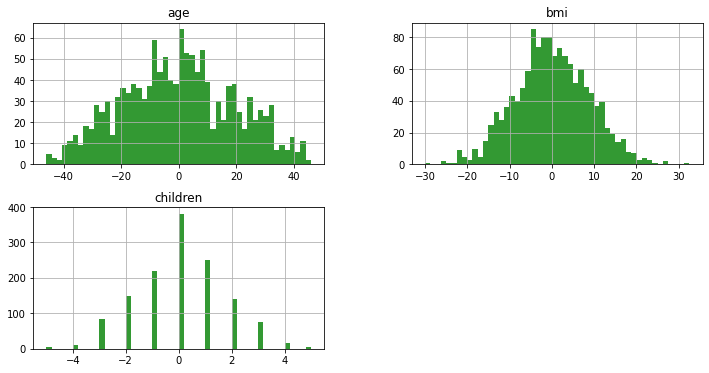

In [7]:
#Histogram Plot
%matplotlib inline
plt.figure();
dataset[['age', 'bmi', 'children']].diff().hist(color="g", alpha=0.8, bins=50, figsize=(12, 6));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'charges Distplot')

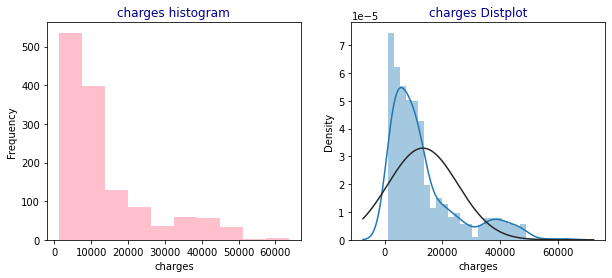

In [9]:
#Histogram Plot (Charges)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(dataset["charges"], color="pink")
plt.xlabel("charges")
plt.ylabel("Frequency")
plt.title("charges histogram", color = "darkblue")
plt.subplot(1,2,2)
sns.distplot(dataset["charges"], fit=norm)
plt.title("charges Distplot", color = "darkblue")

### Visualisation of the effect of different features on others

**Effect of age on Charges**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.



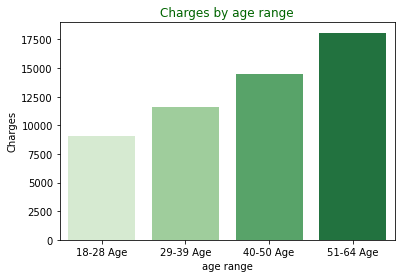

In [11]:
ageFirstDecember = dataset[dataset["age"].between(18,28, inclusive = True)]["charges"].mean()
ageSecondDecember = dataset[dataset["age"].between(29,39, inclusive = True)]["charges"].mean()
ageThirdDecember = dataset[dataset["age"].between(40,50, inclusive = True)]["charges"].mean()
ageFourthDecember = dataset[dataset["age"].between(51,64, inclusive = True)]["charges"].mean()
averageAge = [ageFirstDecember,ageSecondDecember,ageThirdDecember,ageFourthDecember]
ageRanges = ["18-28 Age","29-39 Age","40-50 Age","51-64 Age"]
sns.barplot(x=ageRanges, y=averageAge, palette="Greens")
plt.title("Charges by age range", color = "darkgreen")
plt.xlabel("age range")
plt.ylabel("Charges")

plt.show()

we see the wages paid according to the average age. We see that the insurance charges increase as the age gets older. The highest wages appear between the ages of 51-64. We can use this in the model section.

**Effect of gender on Smoking Habbits**

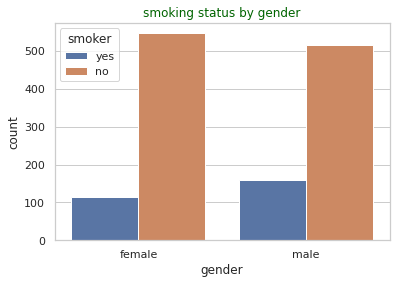

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="sex", hue="smoker", data=dataset)
plt.title("smoking status by gender", color = "darkgreen")
plt.xlabel("gender")
plt.show()

**Effect of no. of Children on Charges**

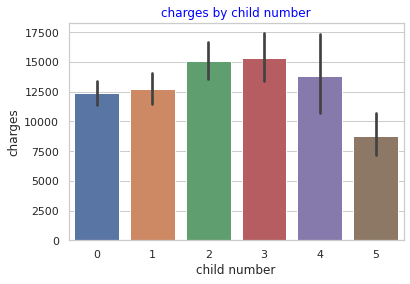

In [13]:
sns.set_theme(style="whitegrid")
barplot= sns.barplot(x="children", y="charges", data=dataset)
plt.title("charges by child number", color = "blue")
plt.xlabel("child number")
plt.ylabel("charges")
plt.show()

Here we notice that at first with the increase of no. of children people were more opting for insurance, but after a certain no. it started decreasing

**Effect of Smoking Status**

Text(0, 0.5, 'charges mean')

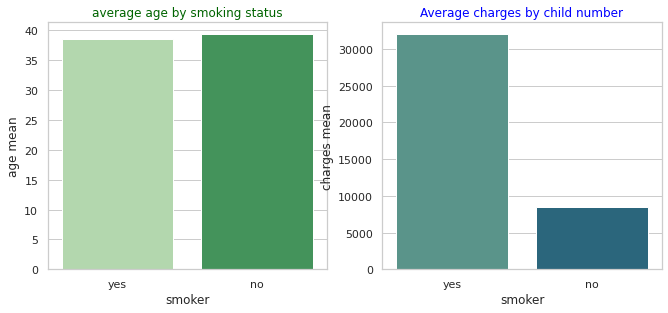

In [14]:
smoker = ["yes", "no"]

smokerAge = []
smokerCharges = []

for each in smoker:
    smokerDistinction = dataset[dataset["smoker"] == each]
    xxx = smokerDistinction["age"].mean()
    yyy = smokerDistinction["charges"].mean()
    smokerAge.append(xxx)
    smokerCharges.append(yyy)

    
plt.figure(figsize=(11,10))
plt.subplot(2,2,1)
sns.barplot(x = smoker, y = smokerAge, palette= "Greens")
plt.title("average age by smoking status", color = "darkgreen")
plt.xlabel("smoker")
plt.ylabel("age mean")
plt.subplot(2,2,2)
sns.barplot(x = smoker, y = smokerCharges, palette="crest")
plt.title("Average charges by child number", color = "blue")
plt.xlabel("smoker")
plt.ylabel("charges mean")

* In the first graph, the average age of smokers and 



* non-smokers is looked at.
In the second graph, we look at the impact of smoking status on wages. Here we see that smokers pay much more than non-smokers.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



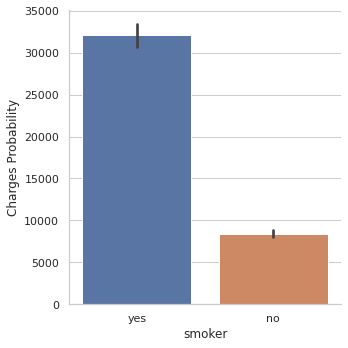

In [15]:
g = sns.factorplot(x = "smoker", y = "charges", data = dataset, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

**Effect of Region on Charges**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



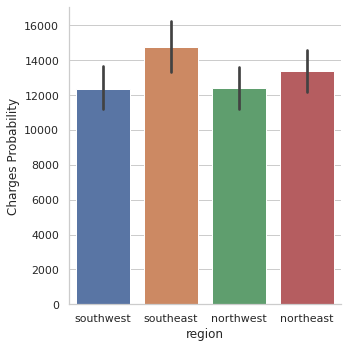

In [16]:
g = sns.factorplot(x = "region", y = "charges", data = dataset, kind = "bar")
g.set_ylabels("Charges Probability")
plt.show()

People belong to southeast have the highest medical insurance charges

**Handling skewness of Charges**

By examining the charges in the charts above, we noticed that there was skewness. We took notes to fix this. We're going to fix this here.

In [17]:
(mu, sigma) = norm.fit(dataset["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 13270.422265141257, sigma charges : 12105.484975561612


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



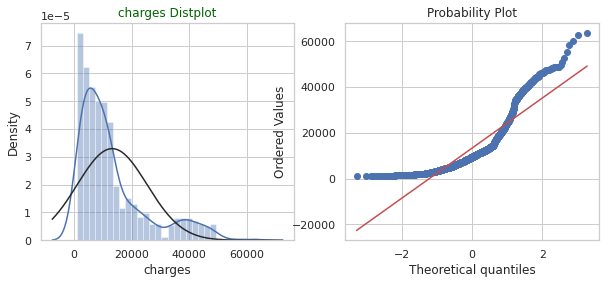

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["charges"], fit=norm)
plt.title("charges Distplot", color = "darkgreen")
plt.subplot(1,2,2)
stats.probplot(dataset["charges"], plot = plt)
plt.show()

We have already taken a look at the first graphic above. We can see from the second graph that we have skewness in our data.

The more data is collected above the middle red line, the better.

There are many ways to fix this. one here we will use numpy library.

In [19]:
dataset["charges"] = np.log1p(dataset["charges"])
(mu, sigma) = norm.fit(dataset["charges"])
print("mu {} : {}, sigma {} : {}".format("charges", mu, "charges", sigma))

mu charges : 9.098827980629359, sigma charges : 0.9190355163595243


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



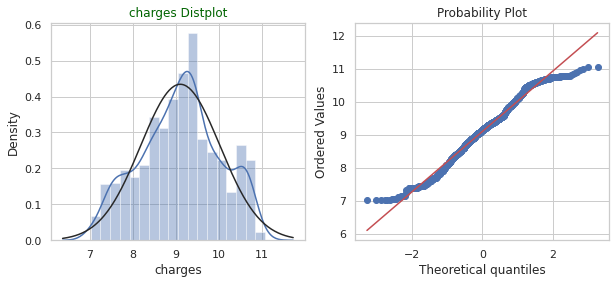

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["charges"], fit=norm)
plt.title("charges Distplot", color = "darkgreen")
plt.subplot(1,2,2)
stats.probplot(dataset["charges"], plot = plt)
plt.show()